# Final Project: Statistical Analysis of Student Performance

## Project Scenario

You are a teacher conducting a study on factors influencing student performance in exams. You have obtained the "Student Performance" dataset from Kaggle, which contains information about students' demographics and their scores in different subjects. Your task is to analyze the data, identify patterns, and draw conclusions about factors affecting student performance.

Dataset Link: [Student Performance Dataset](https://www.kaggle.com/spscientist/students-performance-in-exams)

## Instructions

You are required to perform the following analyses and answer the questions using the data provided.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 1. Basic Statistical Analysis
Calculate the mean and standard deviation for the math score, reading score, and writing score columns.

In [4]:
# Calculate mean
math_mean = np.mean(data['math score'])
reading_mean = np.mean(data['reading score'])
writing_mean = np.mean(data['writing score'])

# Calculate standard deviation
math_std = np.std(data['math score'], ddof=0)
reading_std = np.std(data['reading score'], ddof=0)
writing_std = np.std(data['writing score'], ddof=0)

print(f"Mean Math Score: {math_mean}, Std: {math_std}")
print(f"Mean Reading Score: {reading_mean}, Std: {reading_std}")
print(f"Mean Writing Score: {writing_mean}, Std: {writing_std}")

Mean Math Score: 66.089, Std: 15.155496659628149
Mean Reading Score: 69.169, Std: 14.592890015346516
Mean Writing Score: 68.054, Std: 15.188057281956768


# 2. Probabilities

Calculate the probability that a student is Male or has a Math_Score above 80.

In [6]:
# Calculate probabilities
total_students = len(data)

p_male = len(data[data['gender'] == 'male']) / total_students
p_math_above_80 = len(data[data['math score'] > 80]) / total_students
p_male_and_math_above_80 = len(data[(data['gender'] == 'male') & (data['math score'] > 80)]) / total_students


# Union probability
p_union = p_male + p_math_above_80 - p_male_and_math_above_80
print(f"Probability of Male or Math Score > 80: {p_union}")

Probability of Male or Math Score > 80: 0.5499999999999999


Calculate the probability that a student is Male and has a Math_Score above 80.

In [7]:
# Calculate probabilities

p_male = len(data[data['gender'] == 'male']) / total_students
p_math_above_80 = len(data[data['math score'] > 80]) / total_students
p_male_and_math_above_80 = len(data[(data['gender'] == 'male') & (data['math score'] > 80)]) / total_students


# Union probability
# If the events of being male and having math score higher than 80 were independent, the intersection would be calculated as below.
p_intersection = p_male * p_math_above_80
print(f"Probability of Male and Math Score > 80: Assuming independence is {p_intersection} and Based on data is {p_male_and_math_above_80}")


Probability of Male and Math Score > 80: Assuming independence is 0.08483199999999999 and Based on data is 0.108


### Bayes' Theorem
Calculate the probability that a student is Male given they have a Math_Score above 80.

In [8]:
# Calculate conditional probability using Bayes' theorem


p_male_given_math_above_80 = p_male_and_math_above_80 / p_math_above_80
print(f"Probability of Male given Math Score > 80: {p_male_given_math_above_80}")

Probability of Male given Math Score > 80: 0.6136363636363636


# 3. Normal Distribution
Check Normality
Use QQ plot, histogram, and Shapiro-Wilk test to check if Math_Score is normally distributed.

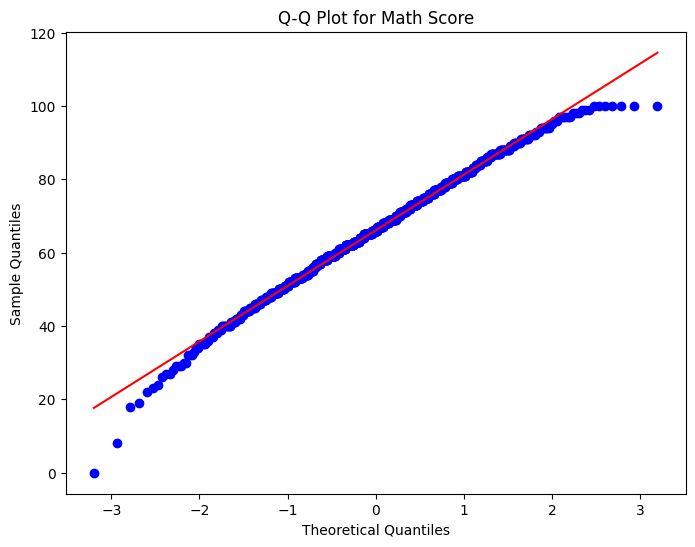

In [9]:
# QQ plot

plt.figure(figsize=(8, 6))
stats.probplot(data['math score'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Math Score')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


Text(0, 0.5, 'Frequency')

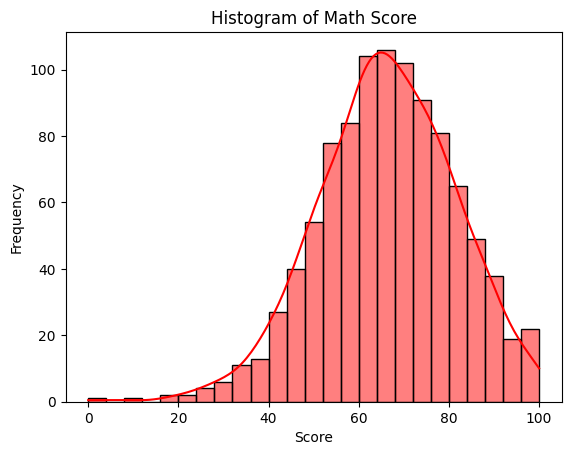

In [10]:
# Histogram

sns.histplot(data['math score'], kde=True, color='red')
plt.title('Histogram of Math Score')
plt.xlabel('Score')
plt.ylabel('Frequency')

In [11]:
# Shapiro-Wilk test

# Null hypothesis: The Math Score data set is normally distributed.
# Alternative hypothesis: The Math Score data set is not normally distributed.

from scipy.stats import shapiro


statistic, p_value = shapiro(data['math score'])
print(f"Shapiro-Wilk Test for Math Score: Statistic = {statistic}, p-value = {p_value}")

print(f"T-statistic: {statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis, The Math Score data set is not normally distributed.")
else:
    print("Fail to reject the null hypothesis, indicating that the data is normally distributed.")

Shapiro-Wilk Test for Math Score: Statistic = 0.9931513872437832, p-value = 0.00014545719606603633
T-statistic: 0.9931513872437832, p-value: 0.00014545719606603633
Reject the null hypothesis, The Math Score data set is not normally distributed.


# 4. Z-Score and Noise Removal

Calculate the z-scores for the Math_Score column and remove noise (more than 95%).


In [12]:
# Calculate z-scores

data['Math_Score_z'] = (data['math score'] - math_mean) / math_std

# Remove noise

# We should calculate lower and upper bound of 95% accuracy.
# 100% - 95% = 5%

lower = np.percentile(data['Math_Score_z'], 2.5)
upper = np.percentile(data['Math_Score_z'], 97.5)

cleaned_data = data[(data['Math_Score_z'] >= lower) & (data['Math_Score_z'] <= upper)]

print(f"Original data size: {data.shape}")
print(f"Cleaned data size: {cleaned_data.shape}")


Original data size: (1000, 9)
Cleaned data size: (954, 9)


# 5. Visualizations
Generate different plots (box, histogram, scatter, pie) to visualize Math Score column before and after removing noise.

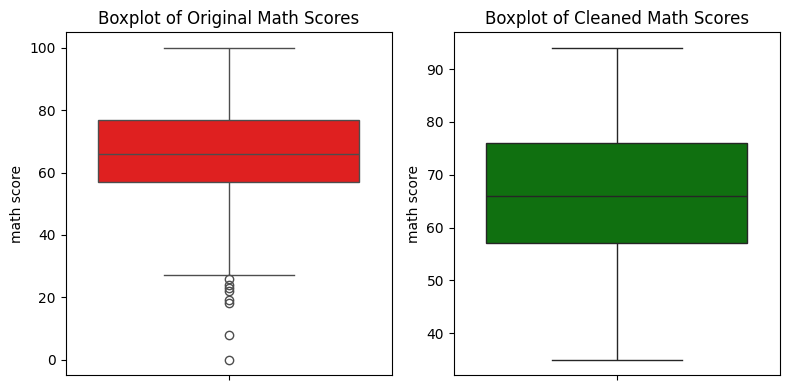

In [13]:
# Box plot

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.boxplot(data['math score'], color='red')
plt.title('Boxplot of Original Math Scores')

plt.subplot(1, 2, 2)
sns.boxplot(cleaned_data['math score'], color='green')
plt.title('Boxplot of Cleaned Math Scores')

plt.tight_layout()

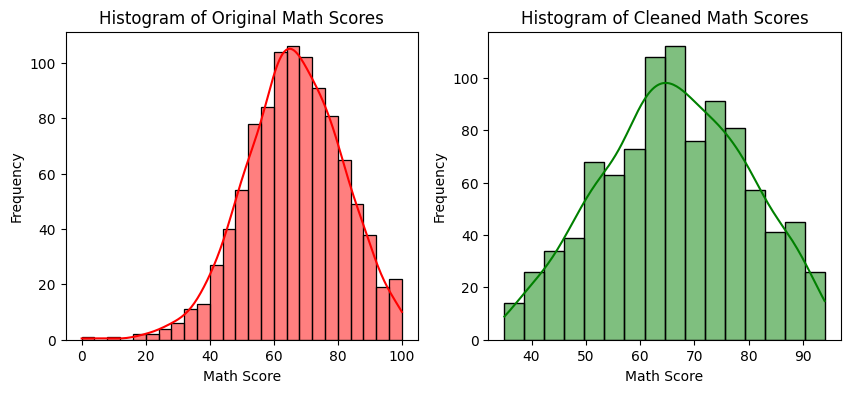

In [14]:
# Histogram
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Histogram of Original Math Scores')
sns.histplot(data['math score'], kde=True, color='red')
plt.xlabel('Math Score')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.title('Histogram of Cleaned Math Scores')
sns.histplot(cleaned_data['math score'], kde=True, color='green')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

plt.show()


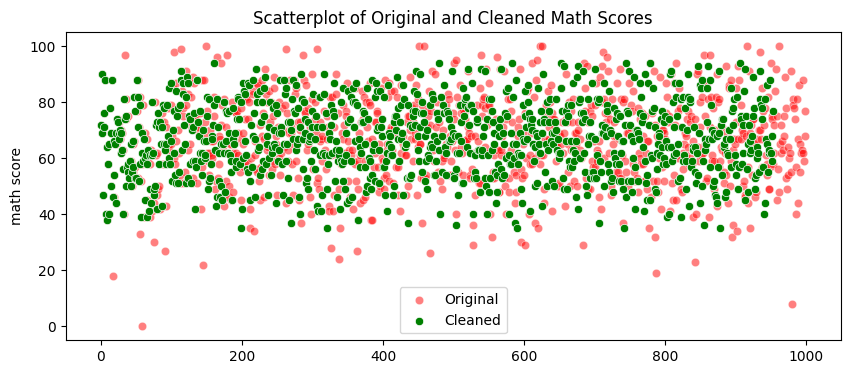

In [ ]:
# Scatter plot

plt.figure(figsize=(10, 4))
sns.scatterplot(x=range(len(data['math score'])), y=data['math score'], alpha=0.5, color='red', label='Original')
sns.scatterplot(x=range(len(cleaned_data['math score'])), y=cleaned_data['math score'], alpha=1, color='green', label='Cleaned')

plt.title('Scatterplot of Original and Cleaned Math Scores')

plt.show()

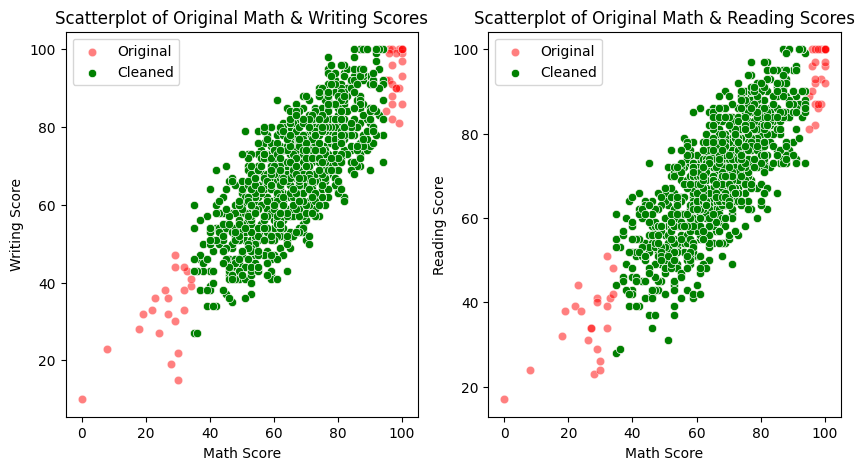

In [16]:
# Scatter plot

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='math score', y='writing score', alpha=0.5, color='red', label='Original')
sns.scatterplot(data=cleaned_data, x='math score', y='writing score',alpha=1, color='green', label='Cleaned')

plt.title('Scatterplot of Original Math & Writing Scores')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')

plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='math score', y='reading score', alpha=0.5, color='red', label='Original')
sns.scatterplot(data=cleaned_data, x='math score', y='reading score',alpha=1, color='green', label='Cleaned')
plt.title('Scatterplot of Original Math & Reading Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')

plt.show()

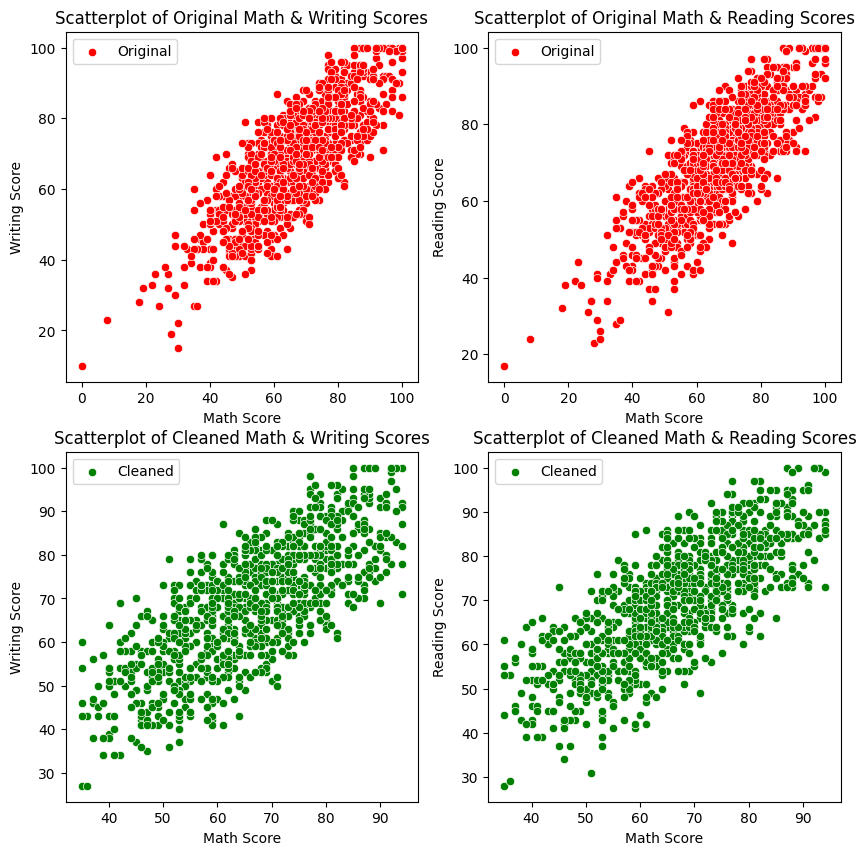

In [96]:
# Scatter plot

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=data, x='math score', y='writing score', color='red', label='Original')

plt.title('Scatterplot of Original Math & Writing Scores')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')

plt.subplot(2, 2, 2)
sns.scatterplot(data=data, x='math score', y='reading score', color='red', label='Original')
plt.title('Scatterplot of Original Math & Reading Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')

plt.subplot(2, 2, 3)
sns.scatterplot(data=cleaned_data, x='math score', y='writing score', color='green', label='Cleaned')
plt.title('Scatterplot of Cleaned Math & Writing Scores')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')

plt.subplot(2, 2, 4)

sns.scatterplot(data=cleaned_data, x='math score', y='reading score', color='green', label='Cleaned')
plt.title('Scatterplot of Cleaned Math & Reading Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')

plt.show()

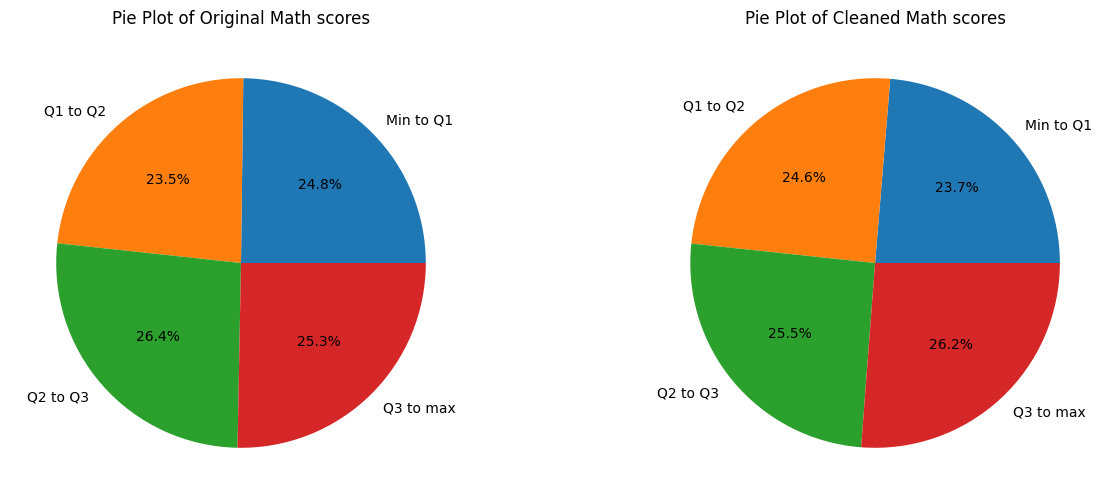

In [17]:
# Pie chart

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
min_org = np.min(data['math score'])
Q1_org = np.percentile(data['math score'], 25)
Q2_org = np.percentile(data['math score'], 50)
Q3_org = np.percentile(data['math score'], 75)
max_org = np.max(data['math score'])

labels = ['Min to Q1', 'Q1 to Q2', 'Q2 to Q3', 'Q3 to max']
size_org = [np.sum((data['math score'] >= min_org) & (data['math score'] < Q1_org)),
            np.sum((data['math score'] >= Q1_org) & (data['math score'] < Q2_org)),
            np.sum((data['math score'] >= Q2_org) & (data['math score'] < Q3_org)),
            np.sum((data['math score'] >= Q3_org) & (data['math score'] <= max_org))
]

plt.pie(size_org, labels=labels, autopct='%1.1f%%')
plt.title('Pie Plot of Original Math scores')


plt.subplot(1, 2, 2)
min_cleaned = np.min(cleaned_data['math score'])
Q1_cleaned = np.percentile(cleaned_data['math score'], 25)
Q2_cleaned = np.percentile(cleaned_data['math score'], 50)
Q3_cleaned = np.percentile(cleaned_data['math score'], 75)
max_cleaned = np.max(cleaned_data['math score'])

size_cleaned = [np.sum((cleaned_data['math score'] >= min_cleaned) & (cleaned_data['math score'] < Q1_cleaned)),
            np.sum((cleaned_data['math score'] >= Q1_cleaned) & (cleaned_data['math score'] < Q2_cleaned)),
            np.sum((cleaned_data['math score'] >= Q2_cleaned) & (cleaned_data['math score'] < Q3_cleaned)),
            np.sum((cleaned_data['math score'] >= Q3_cleaned) & (cleaned_data['math score'] <= max_cleaned))
]

plt.pie(size_cleaned, labels=labels, autopct='%1.1f%%')
plt.title('Pie Plot of Cleaned Math scores')

plt.show()

# 6. Parametric Hypothesis Testing

### Two samples
Perform a two-sample hypothesis test to compare the Math_Score between Male and Female students. (use cleaned data and choose  appropriate test)

In [ ]:
from scipy.stats import ttest_ind

male_math_score = cleaned_data[(cleaned_data['gender'] == 'male')]['math score']
female_math_score = cleaned_data[(cleaned_data['gender'] == 'female')]['math score']

# Because the samples are two independent samples, so I will use t-student test.
# Null hypothesis: There is no significant difference in math scores between male and female students.
# Alternative hypothesis: There is a significant difference in math scores between male and female students.

t_statistic, p_value = ttest_ind(male_math_score, female_math_score)
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in math scores between male and female students.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in math scores between male and female students.")

T-statistic: 4.669571970316269, p-value: 3.4514727382035406e-06
Reject the null hypothesis. There is a significant difference in math scores between male and female students.


### 3 Samples or More
Perform an hypothesis test to compare the Math_Score across different ethnicities.

In [19]:
A = cleaned_data[(cleaned_data['race/ethnicity'] == 'group A')]['math score']
B = cleaned_data[(cleaned_data['race/ethnicity'] == 'group B')]['math score']
C = cleaned_data[(cleaned_data['race/ethnicity'] == 'group C')]['math score']

# because the samples are three independent samples, so I will use ANOVA test.

# Null hypothesis: There is no significant difference in math scores between different ethnicities.
# Alternative hypothesis: There is a significant difference in math scores between different ethnicities.

t_statistic, p_value = stats.f_oneway(A, B, C)
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

#Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in math scores between different ethnicities.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in math scores between different ethnicities.")


T-statistic: 2.4269339192657715, p-value: 0.08922081576526532
Fail to reject the null hypothesis. There is no significant difference in math scores between different ethnicities.


# 7. Confidence Interval


Calculate a 95% confidence interval for the mean Math_Score.

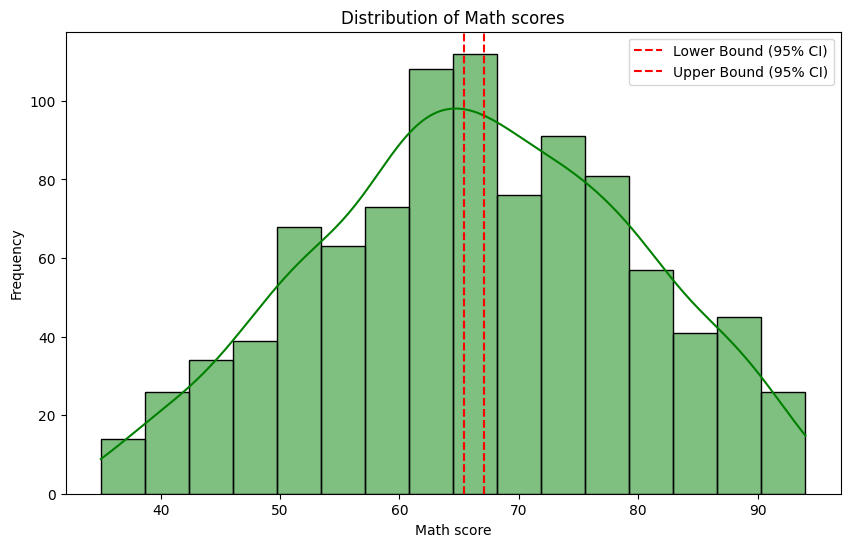

95% Confidence interval for mean Math Scores: (np.float64(65.37575487069947), np.float64(67.06030382951019))


In [29]:
n = len(cleaned_data)

confidence_level = 0.95
alpha = 1 - confidence_level
z = stats.norm.ppf(1 - alpha / 2)

# Calculate standard error
standard_error = cleaned_data['math score'].std(ddof=1) / (n**0.5)

# Calculate confidence interval
lower_bound = cleaned_data['math score'].mean() - z * standard_error
upper_bound = cleaned_data['math score'].mean() + z * standard_error

# Visualize confidence interval
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['math score'], kde=True, color='green')
plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower Bound (95% CI)')
plt.axvline(x=upper_bound, color='red', linestyle='--', label='Upper Bound (95% CI)')
plt.title('Distribution of Math scores')
plt.xlabel('Math score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Output confidence interval
confidence_interval = (lower_bound, upper_bound)

print(f"95% Confidence interval for mean Math Scores: {confidence_interval}")